In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import obspy
import matplotlib.gridspec as gridspec 
import matplotlib.mlab as mlab
import numpy as np
from data_earthquake import Earthquake
from data_so2_sat import SO2_Sat
import visualize
import Correlations

# get volc locs

In [3]:
volc_locs = np.load("data_git/volcano_locations.npy")[()]

In [4]:
for volc in volc_locs:
    print volc_locs[volc], ": \t", volc

(13.433799, -88.268887) : 	San Miguel
(10.016997, -83.764515) : 	Turrialba
(10.462964, -84.703694) : 	Arenal
(1.221699, -77.358468) : 	Galeras
(4.893614, -75.317858) : 	Nevado del Ruiz
(19.022154, -98.627748) : 	Popocatepetl
(-0.683719, -78.436608) : 	Cotopaxi
(14.474506, -90.880327) : 	Fuego de Guatemala
(-21.245098, 55.715342) : 	Piton de la Fournaise
(13.854698, -89.627554) : 	Santa Ana
(-1.470183, -78.44454) : 	Tungurahua
(19.512942, -103.617655) : 	Fuego de Colima
(12.704431, -87.003621) : 	San Cristobal
(38.403679, 14.962679) : 	Vulcano
(37.75122, 14.994171) : 	Etna
(-1.410324, 29.204375) : 	Nyamuragira
(11.984259, -86.166345) : 	Masaya
(-1.522102, 29.249768) : 	Nyiragongo
(14.749341, -91.56677) : 	Santiaguito


In [49]:
so2.so2_timeseq.keys()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.74533128552138805,
 0.0,
 0.0,
 1.6516396184451878,
 0.69566745916381478,
 0.15333150699734688,
 0.60981399472802877,
 4.8138126730918884,
 5.0698495167307556,
 1.9923625566880219,
 0.33367686718702316,
 0.086232476867735386,
 0.0,
 1.6015360532328486,
 0.21346429921686649,
 -0.088774491450749338,
 0.11533361859619617,
 0.29177073622122407,
 0.1090615545399487,
 0.4016078975982964,
 0.0,
 0.13658996997401118,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.36655470356345177,
 0.0,
 0.0,
 0.82732525491155684,
 -0.80951160984113812,
 -0.12873421926633455,
 -0.019480263814330101,
 0.42232767620589584,
 0.35310344723984599,
 0.0,
 0.0,
 -0.15317723713815212,
 -0.19538665749132633,
 0.21163484919816256,
 0.069748160196468234,
 0.52354543260298669,
 0.0,
 0.0,
 -0.20929744304157794,
 -0.63787923008203506,
 -0.35011440882226452,
 -0.019358715158887208,
 -0

# get so2 / earthquake data

San Miguel
load events 'data_git/earthquakes/(13.433799, -88.268887)_1.0_1.0.npy' ...
loaded 1630 events


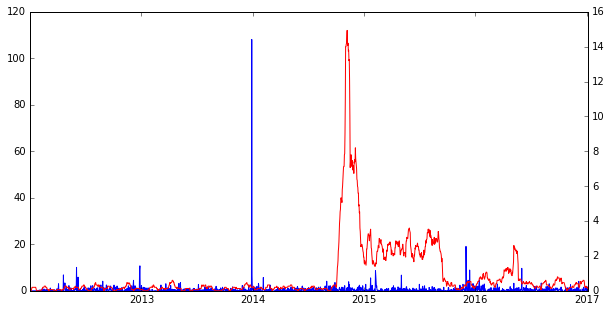

Turrialba
load events 'data_git/earthquakes/(10.016997, -83.764515)_1.0_1.0.npy' ...
loaded 427 events


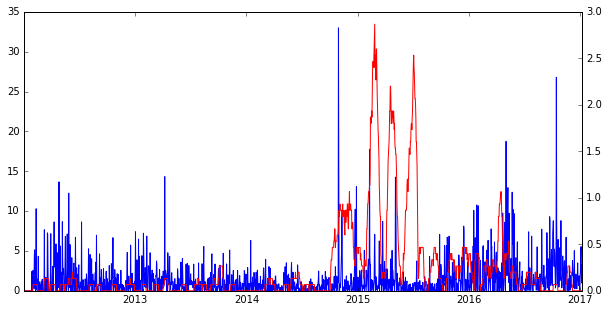

Arenal
load events 'data_git/earthquakes/(10.462964, -84.703694)_1.0_1.0.npy' ...
loaded 516 events


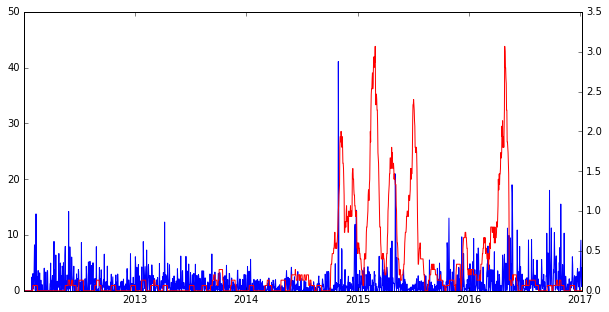

Galeras
load events 'data_git/earthquakes/(1.221699, -77.358468)_1.0_1.0.npy' ...
loaded 300 events


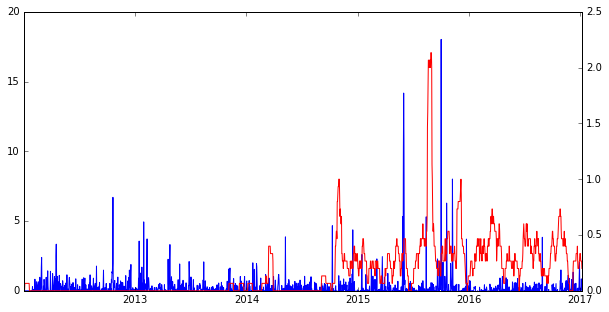

Nevado del Ruiz
load events 'data_git/earthquakes/(4.893614, -75.317858)_1.0_1.0.npy' ...
loaded 1639 events


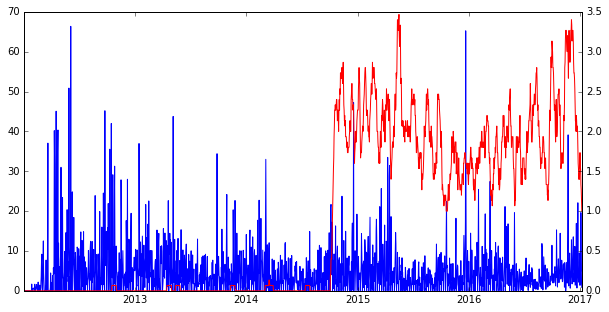

Popocatepetl
load events 'data_git/earthquakes/(19.022154, -98.627748)_1.0_1.0.npy' ...
loaded 100 events


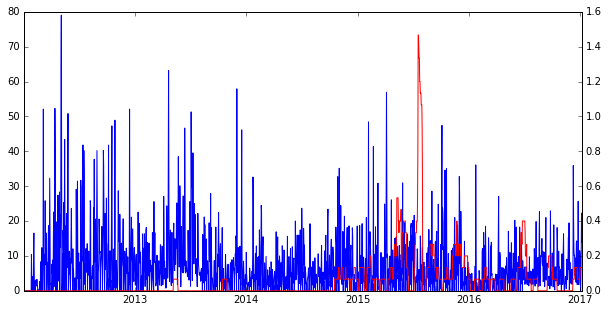

Cotopaxi
load events 'data_git/earthquakes/(-0.683719, -78.436608)_1.0_1.0.npy' ...
loaded 96 events


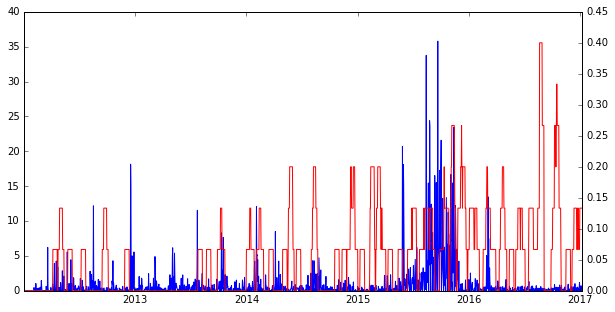

Fuego de Guatemala
load events 'data_git/earthquakes/(14.474506, -90.880327)_1.0_1.0.npy' ...
loaded 1144 events


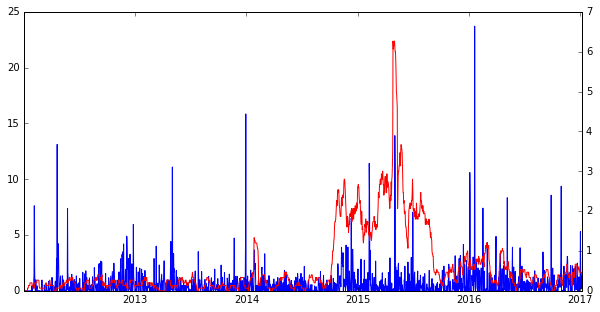

Piton de la Fournaise
load events 'data_git/earthquakes/(-21.245098, 55.715342)_1.0_1.0.npy' ...
loaded 0 events


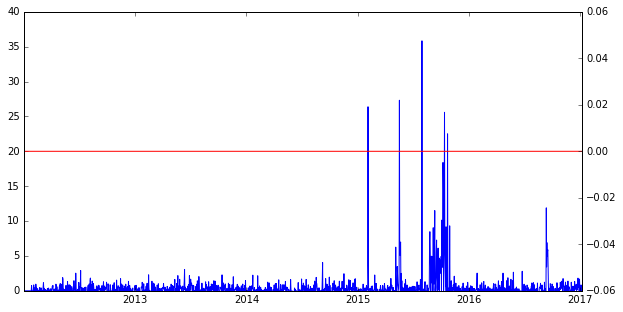

Santa Ana
load events 'data_git/earthquakes/(13.854698, -89.627554)_1.0_1.0.npy' ...
loaded 1423 events


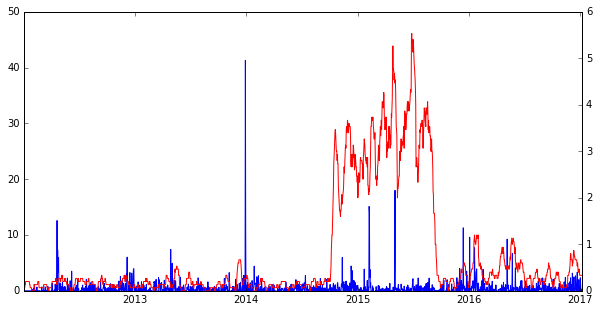

Tungurahua
load events 'data_git/earthquakes/(-1.470183, -78.44454)_1.0_1.0.npy' ...
loaded 120 events


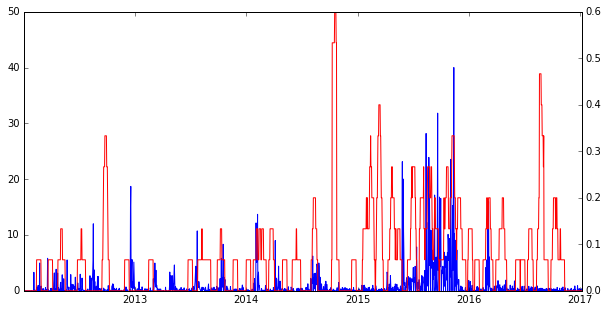

Fuego de Colima
load events 'data_git/earthquakes/(19.512942, -103.617655)_1.0_1.0.npy' ...
loaded 249 events


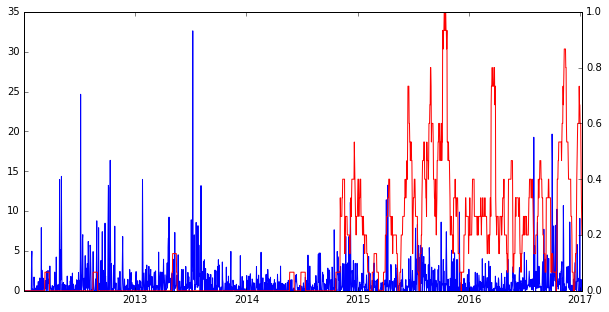

San Cristobal
load events 'data_git/earthquakes/(12.704431, -87.003621)_1.0_1.0.npy' ...
loaded 933 events


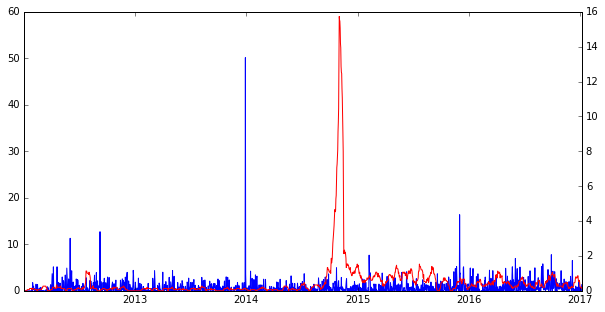

Vulcano
load events 'data_git/earthquakes/(38.403679, 14.962679)_1.0_1.0.npy' ...
loaded 3244 events


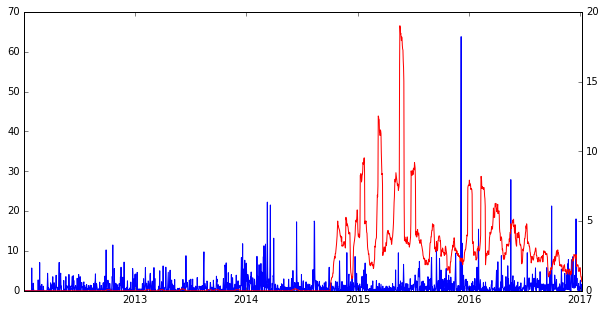

Etna
load events 'data_git/earthquakes/(37.75122, 14.994171)_1.0_1.0.npy' ...
loaded 3412 events


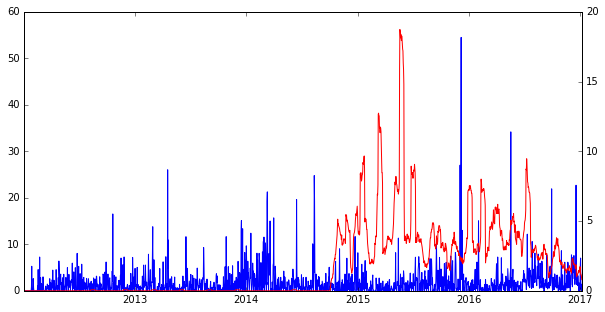

Nyamuragira
load events 'data_git/earthquakes/(-1.410324, 29.204375)_1.0_1.0.npy' ...
loaded 17 events


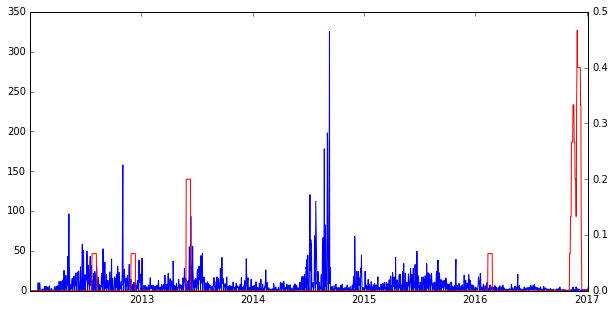

Masaya
load events 'data_git/earthquakes/(11.984259, -86.166345)_1.0_1.0.npy' ...
loaded 557 events


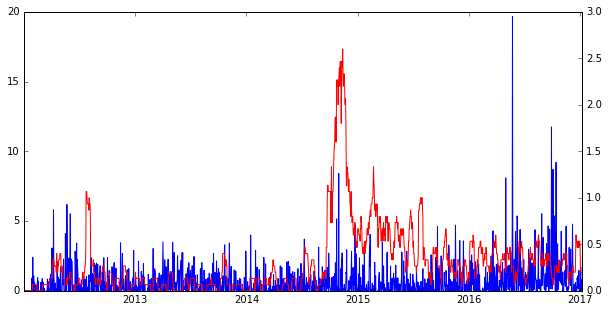

Nyiragongo
load events 'data_git/earthquakes/(-1.522102, 29.249768)_1.0_1.0.npy' ...
loaded 16 events


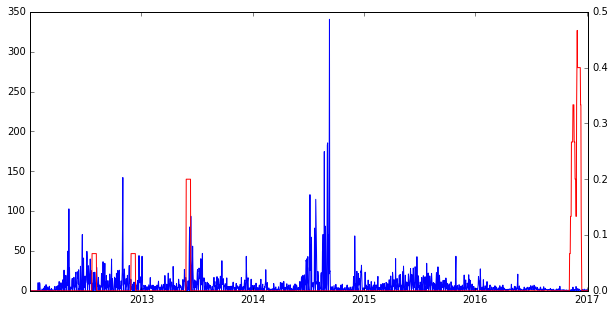

Santiaguito
load events 'data_git/earthquakes/(14.749341, -91.56677)_1.0_1.0.npy' ...
loaded 1838 events


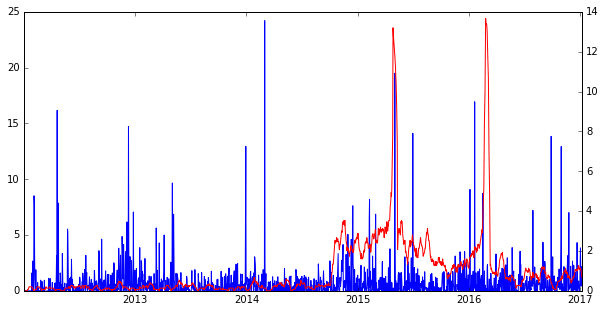

In [53]:
t_box = 15

for volc_name in volc_locs:
    print volc_name
    
    loc = volc_locs[volc_name]
    t_beg = (2012, 1, 2)
    t_end = (2017, 1, 6)
    eq = Earthquake(loc, t_beg=t_beg, t_end=t_end)
    so2 = SO2_Sat(loc, t_beg=t_beg, t_end=t_end)

    eq_dates, eq_freq = eq.get_mean_frequency(time_interval=t_box)

    so2_dates = np.array(so2.dates)
    so2_vals  = np.array(so2.so2_timeseq["SO2_TRL"])

    visualize.show_so2_eq_freq_timeline(so2_dates, so2_vals,
                                        eq_dates, eq_freq)
